In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display
import tensorflow as tf

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

## Dataset
** Alternative sources of the data just in case: **

* http://yann.lecun.com/exdb/mnist/
* https://github.com/mrgloom/MNIST-dataset-in-different-formats

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
X_train = mnist.train.images
y_train = mnist.train.labels

X_test = mnist.test.images
y_test = mnist.test.labels

display(X_train.shape)
display(y_train.shape)

display(X_test.shape)
display(y_test.shape)

(55000, 784)

(55000, 10)

(10000, 784)

(10000, 10)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

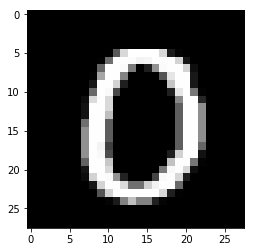

In [5]:
plt.imshow(X_train[10].reshape(28,28),cmap='gist_gray')
display(y_train[10])

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

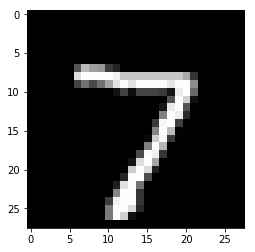

In [6]:
plt.imshow(X_test[0].reshape(28,28),cmap='gist_gray')
display(y_test[0])

## Model

In [7]:
# Placeholder
x = tf.placeholder(tf.float32,shape=[None,784])

# Variables
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

# Graph
y = tf.matmul(x,W) + b 

# Loss function
y_true = tf.placeholder(tf.float32,[None,10])
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(
        labels=y_true,
        logits=y))

# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [8]:
# Init Variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    # Init Variables
    sess.run(init)
    
    # Train the model for 1000 steps on the training set
    # Using built in batch feeder from mnist for convenience
    for step in range(1000):
        batch_x , batch_y = mnist.train.next_batch(100)
        sess.run(
            train,
            feed_dict={
                x:batch_x,
                y_true:batch_y})

    # Test the Train Model
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    print(sess.run(
        acc,feed_dict={
            x:mnist.test.images,
            y_true:mnist.test.labels}))

0.9194
